# Blending
### Imports

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

### Create Dataframe

In [3]:
selected_features = pd.read_csv('data/selected_features.csv')
target_column = 'price actual'
y = selected_features[target_column]

Remove unwanted columns

In [4]:
try: 
    selected_features.drop(target_column, axis=1, inplace=True)
    selected_features.drop(target_column + ' ewm', axis=1, inplace=True)
except:
    print('Already dropped')

Already dropped


### Hyperparameter tuning

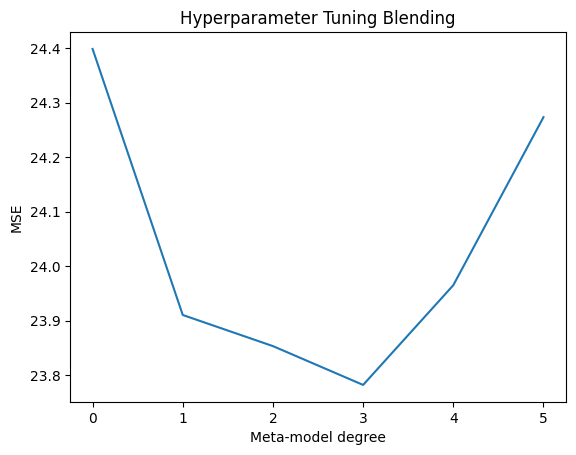

In [10]:
x = selected_features[selected_features.columns]
x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.4, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)

mse_list = []
model1 = RandomForestRegressor(random_state=42)
model1.fit(x_train, y_train)
val_pred1 = model1.predict(x_val)
test_pred1 = model1.predict(x_test)

model2 = DecisionTreeRegressor(random_state=42)
model2.fit(x_train, y_train)
val_pred2 = model2.predict(x_val)
test_pred2 = model2.predict(x_test)

df_val = pd.DataFrame({'pred1': val_pred1, 'pred2': val_pred2})
df_test = pd.DataFrame({'pred1': test_pred1, 'pred2': test_pred2})

for degree in range(2,8):
    meta_model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    meta_model.fit(df_val, y_val)
    y_pred = meta_model.predict(df_test)
    
    mse = mean_squared_error(y_test, y_pred)
    mse_list.append(mse)

plt.title('Hyperparameter Tuning Blending')
plt.plot(mse_list)
plt.xlabel('Meta-model degree')
plt.ylabel('MSE')
plt.show()


### Optimal Hyperparameters

Mean Squared Error (MSE): 23.910171915349373


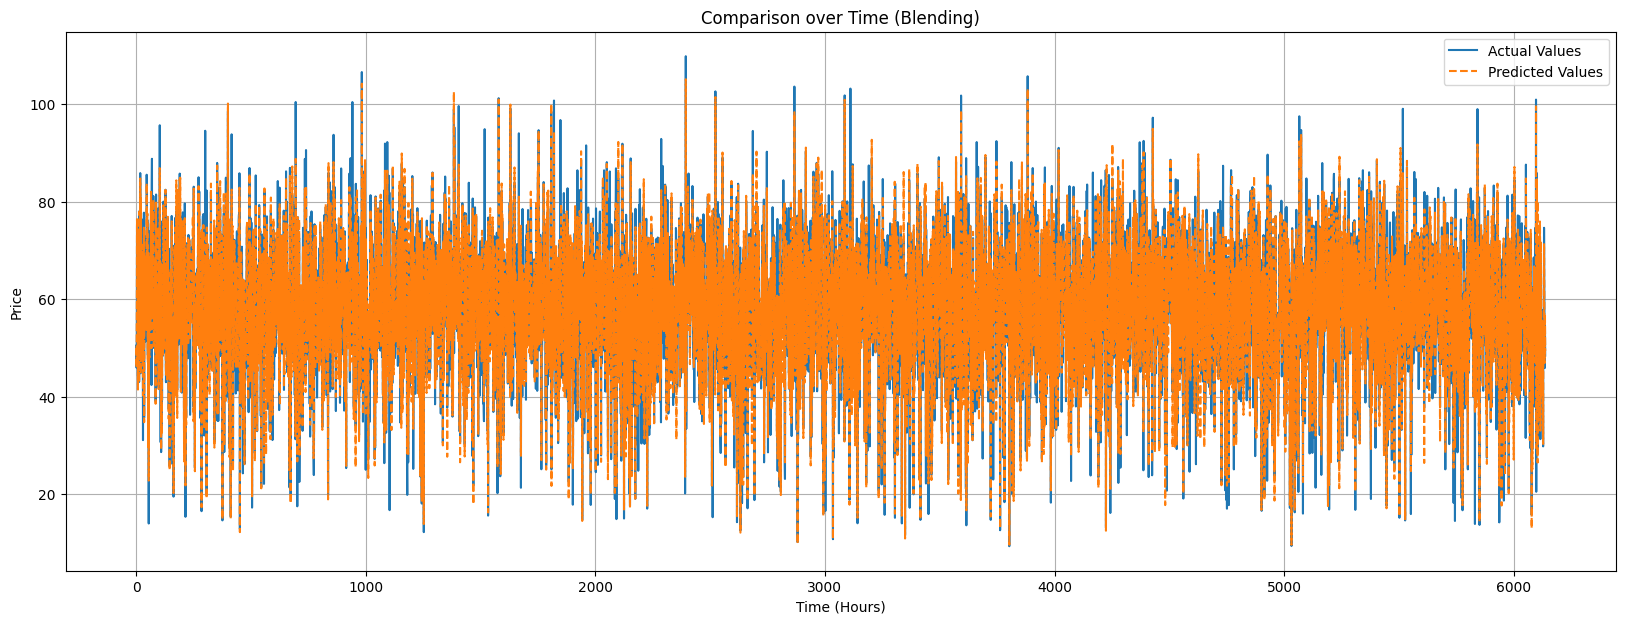

In [13]:
x = selected_features[selected_features.columns]
x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.4, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)

model1 = RandomForestRegressor(random_state=42)
model1.fit(x_train, y_train)
val_pred1 = model1.predict(x_val)
test_pred1 = model1.predict(x_test)

model2 = DecisionTreeRegressor(random_state=42)
model2.fit(x_train, y_train)
val_pred2 = model2.predict(x_val)
test_pred2 = model2.predict(x_test)

# Creating dataframes for meta-model training and prediction
df_val = pd.DataFrame({'pred1': val_pred1, 'pred2': val_pred2})
df_test = pd.DataFrame({'pred1': test_pred1, 'pred2': test_pred2})

meta_model = make_pipeline(PolynomialFeatures(3), LinearRegression())
meta_model.fit(df_val, y_val)
y_pred = meta_model.predict(df_test)

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

plt.figure(figsize=(20, 7))
plt.plot(y_test.reset_index(drop=True), label='Actual Values')
plt.plot(y_pred, label='Predicted Values', linestyle='dashed')
plt.xlabel('Time (Hours)')
plt.ylabel('Price')
plt.title('Comparison over Time (Blending)')
plt.legend()
plt.grid(True)
plt.show()

### Save to CSV

In [6]:
blending = pd.DataFrame(y_pred)
blending[1] = y_test.reset_index(drop=True)
blending.to_csv('data/blending.csv', index=False, header=False)